In [27]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import random
from PIL import Image
from keras.datasets import cifar10
from matplotlib import pyplot as plt

In [11]:

# fix random seed for reproducibility
seed = 21
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
def model_init_():
  # Create the model
  model = Sequential()
  
  model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dropout(0.2))

  model.add(Dense(256, kernel_constraint=maxnorm(3)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(128, kernel_constraint=maxnorm(3)))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model
model = model_init_()

In [9]:
epochs = 25
optimizer = 'Adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


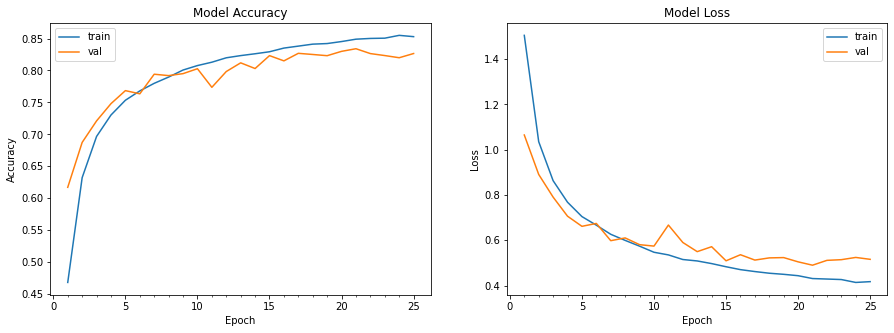

In [14]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(numpy.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(numpy.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [15]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.65%


In [42]:
classes = ['airplane','auto-mobile','bird','cat','deer','dog','frog','horse','ship','truck']

[9.9262083e-01 6.6747496e-05 2.8389593e-04 3.8826976e-05 4.2642419e-06
 6.1281530e-06 6.5152068e-03 1.4399595e-06 2.2473355e-04 2.3789240e-04]
0


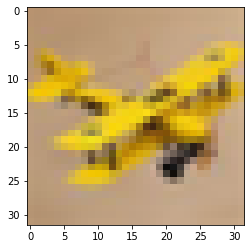

The Answer is airplane


In [49]:
prediction = model.predict(X_test)
random_item = random.randint(0,10000)
# Print one of the results of recognition
print(prediction[random_item])
# Print  class number,which was predicted by neural-Network 
print(numpy.argmax(prediction[random_item]))
index = numpy.argmax(y_test[random_item])
plt.imshow(X_test[random_item], cmap=plt.cm.binary)
plt.show()
print('The Answer is ' + classes[index])
